In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.gridspec as gridspec

In [2]:
df = pd.read_csv('PsxG top 5 leagues.csv')
df

,Rk,Player,Nation,Pos,Squad,Comp,Age,Born,90s,GA,...,Att.2,Launch%.1,AvgLen.1,Opp,Stp,Stp%,#OPA,#OPA/90,AvgDist,Matches
0,1.0,Manuel Riemann,de GER,GK,Bochum,de Bundesliga,33-246,1988.0,31.0,45.0,...,245.0,72.7,52.4,247.0,26.0,10.5,62.0,2.00,18.4,Matches
1,2.0,José Sá,pt POR,GK,Wolves,eng Premier League,29-116,1993.0,36.0,39.0,...,254.0,50.0,41.9,305.0,33.0,10.8,40.0,1.11,15.4,Matches
2,3.0,David de Gea,es ESP,GK,Manchester Utd,eng Premier League,31-187,1990.0,37.0,56.0,...,293.0,51.9,42.8,301.0,9.0,3.0,8.0,0.22,13.5,Matches
3,4.0,Mike Maignan,fr FRA,GK,Milan,it Serie A,26-314,1995.0,30.0,21.0,...,136.0,40.4,38.5,201.0,25.0,12.4,25.0,0.83,15.5,Matches
4,5.0,Walter Benítez,ar ARG,GK,Nice,fr Ligue 1,29-055,1993.0,35.0,30.0,...,249.0,57.8,44.9,305.0,14.0,4.6,20.0,0.57,14.0,Matches
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,199.0,Arthur Desmas,fr FRA,GK,Clermont Foot,fr Ligue 1,28-036,1994.0,14.5,33.0,...,112.0,44.6,36.8,87.0,3.0,3.4,5.0,0.35,12.3,Matches
199,200.0,Illan Meslier,fr FRA,GK,Leeds United,eng Premier League,22-072,2000.0,35.6,77.0,...,267.0,40.8,37.4,232.0,20.0,8.6,34.0,0.96,14.6,Matches
200,201.0,Florian Müller,de GER,GK,Stuttgart,de Bundesliga,24-181,1997.0,29.0,51.0,...,231.0,33.8,32.1,272.0,12.0,4.4,29.0,1.00,14.9,Matches
201,202.0,Benoît Costil,fr FRA,GK,Bordeaux,fr Ligue 1,34-314,1987.0,25.0,62.0,...,217.0,70.5,51.2,196.0,13.0,6.6,26.0,1.04,16.9,Matches


In [3]:
home_df = df.copy()
home_df = home_df.melt(id_vars = ["date", "home_team_name", "away_team_name"])
home_df["venue"] = "H"
home_df.rename(columns = {"home_team_name":"team", "away_team_name":"opponent"}, inplace = True)
home_df.replace({"variable":{"home_team_xG":"xG_for", "away_team_xG":"xG_ag"}}, inplace = True)

KeyError: "The following 'id_vars' are not present in the DataFrame: ['away_team_name', 'date', 'home_team_name']"

In [25]:
away_df = df.copy()
away_df = away_df.melt(id_vars = ["date", "away_team_name", "home_team_name"])
away_df["venue"] = "A"
away_df.rename(columns = {"away_team_name":"team", "home_team_name":"opponent"}, inplace = True)
away_df.replace({"variable":{"away_team_xG":"xG_for", "home_team_xG":"xG_ag"}}, inplace = True)

In [26]:
df = pd.concat([home_df, away_df]).reset_index(drop = True)
df

,date,team,opponent,variable,value,venue
0,13/08/21,Brentford,Arsenal,Wk,1.0,H
1,14/08/21,Manchester Utd,Leeds United,Wk,1.0,H
2,14/08/21,Leicester City,Wolves,Wk,1.0,H
3,14/08/21,Burnley,Brighton,Wk,1.0,H
4,14/08/21,Chelsea,Crystal Palace,Wk,1.0,H
...,...,...,...,...,...,...
9851,22/05/22,Tottenham,Norwich City,Notes,NaN,A
9852,22/05/22,Aston Villa,Manchester City,Notes,NaN,A
9853,22/05/22,Wolves,Liverpool,Notes,NaN,A
9854,22/05/22,Newcastle Utd,Burnley,Notes,NaN,A


In [27]:
# ---- Filter the data

Y_for = df[(df["team"] == "Lazio") & (df["variable"] == "xG_for")]["value"].reset_index(drop = True)
Y_ag = df[(df["team"] == "Lazio") & (df["variable"] == "xG_ag")]["value"].reset_index(drop = True)
X_ = pd.Series(range(len(Y_for)))

# ---- Compute rolling average

Y_for = Y_for.rolling(window = 5, min_periods = 0).mean() # min_periods is for partial avg.
Y_ag = Y_ag.rolling(window = 5, min_periods = 0).mean()

/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/563113808.py:5: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  X_ = pd.Series(range(len(Y_for)))


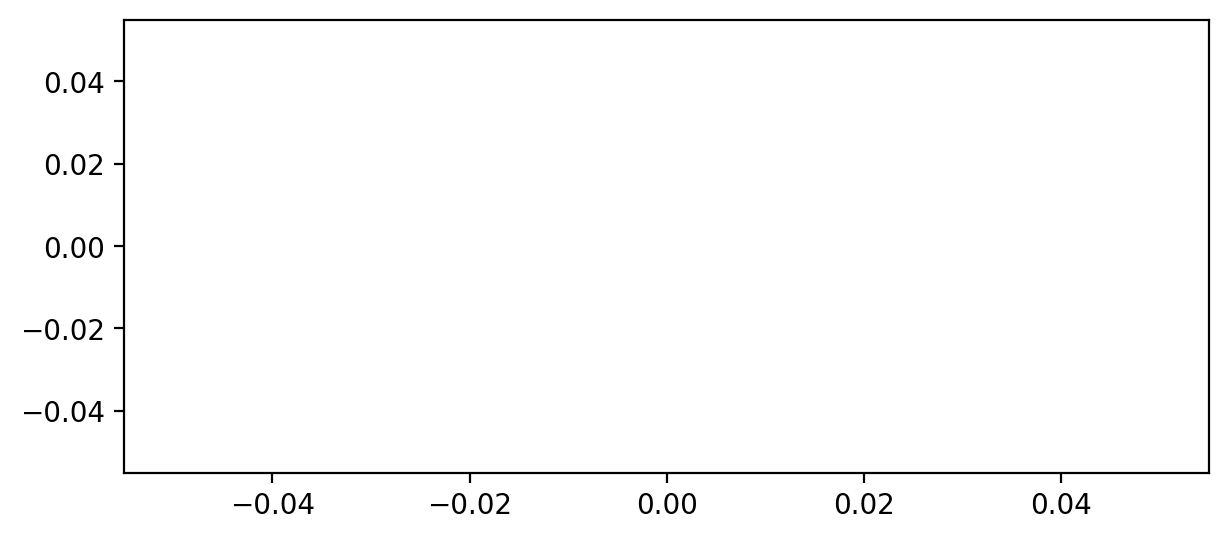

In [28]:
fig, ax = plt.subplots(figsize = (7,3), dpi = 200)

ax.plot(X_, Y_for)
ax.plot(X_, Y_ag)

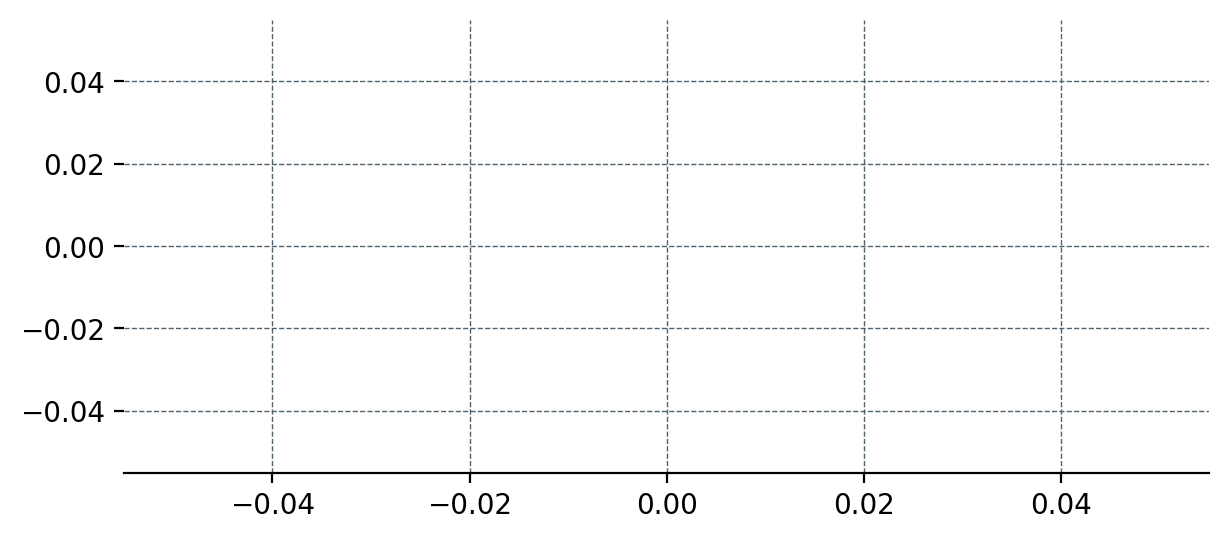

In [29]:
fig, ax = plt.subplots(figsize = (7,3), dpi = 200)

# --- Remove spines and add gridlines

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(ls = "--", lw = 0.5, color = "#4E616C")

# --- The data

ax.plot(X_, Y_for, marker = "o")
ax.plot(X_, Y_ag, marker = "o")

/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/102854249.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])


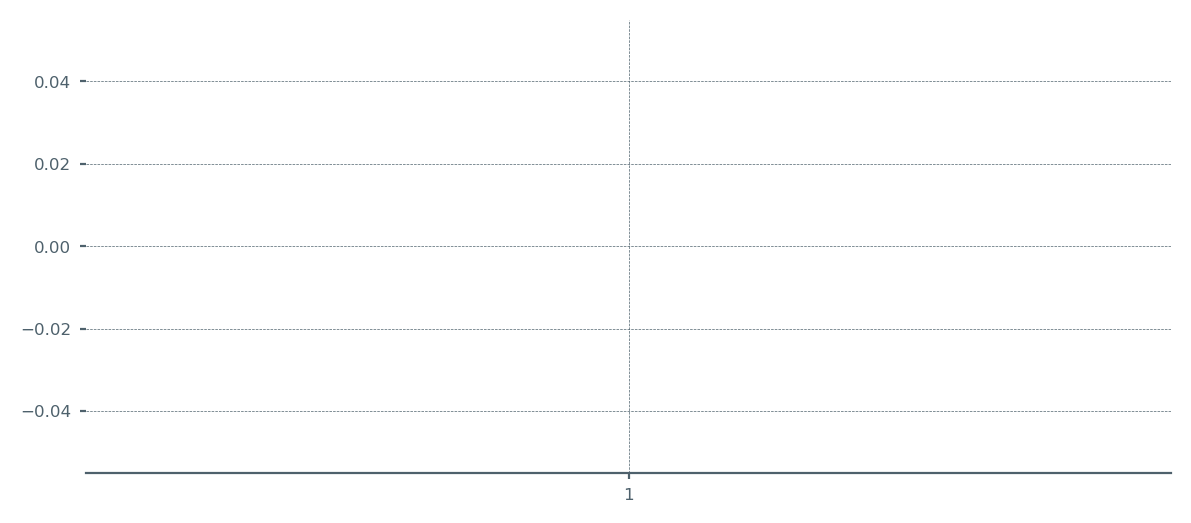

In [30]:
fig, ax = plt.subplots(figsize = (7,3), dpi = 200)

# --- Remove spines and add gridlines

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(ls = "--", lw = 0.25, color = "#4E616C")

# --- The data

ax.plot(X_, Y_for, marker = "o", mfc = "white", ms = 5)
ax.plot(X_, Y_ag, marker = "o", mfc = "white", ms = 5)

# --- Adjust tickers and spine to match the style of our grid

ax.xaxis.set_major_locator(ticker.MultipleLocator(2)) # ticker every 2 matchdays
xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])
# This last line outputs
# [-1, 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33, 35]
# and we mark the tickers every two positions.

ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)
ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)

ax.spines["bottom"].set_edgecolor("#4E616C")

/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/3097394195.py:23: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])


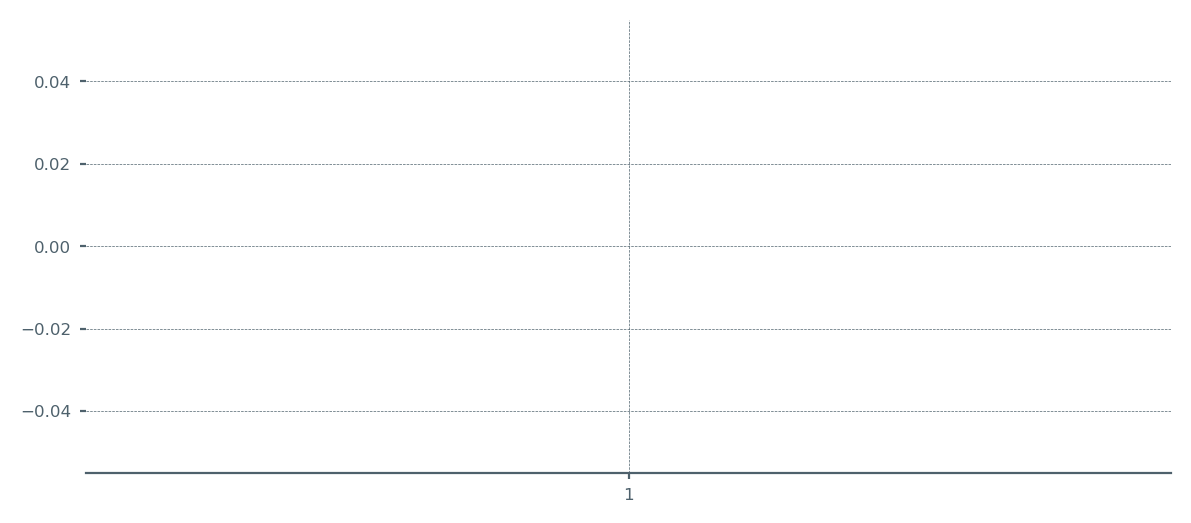

In [31]:
fig, ax = plt.subplots(figsize = (7,3), dpi = 200)

# --- Remove spines and add gridlines

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(ls = "--", lw = 0.25, color = "#4E616C")

# --- The data

ax.plot(X_, Y_for, marker = "o", mfc = "white", ms = 5)
ax.plot(X_, Y_ag, marker = "o", mfc = "white", ms = 5)

# --- Fill between

ax.fill_between(x = X_, y1 = Y_for, y2 = Y_ag, alpha = 0.5)

# --- Adjust tickers and spine to match the style of our grid

ax.xaxis.set_major_locator(ticker.MultipleLocator(2)) # ticker every 2 matchdays
xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])

ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)
ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)

ax.spines["bottom"].set_edgecolor("#4E616C")

/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/898992775.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])


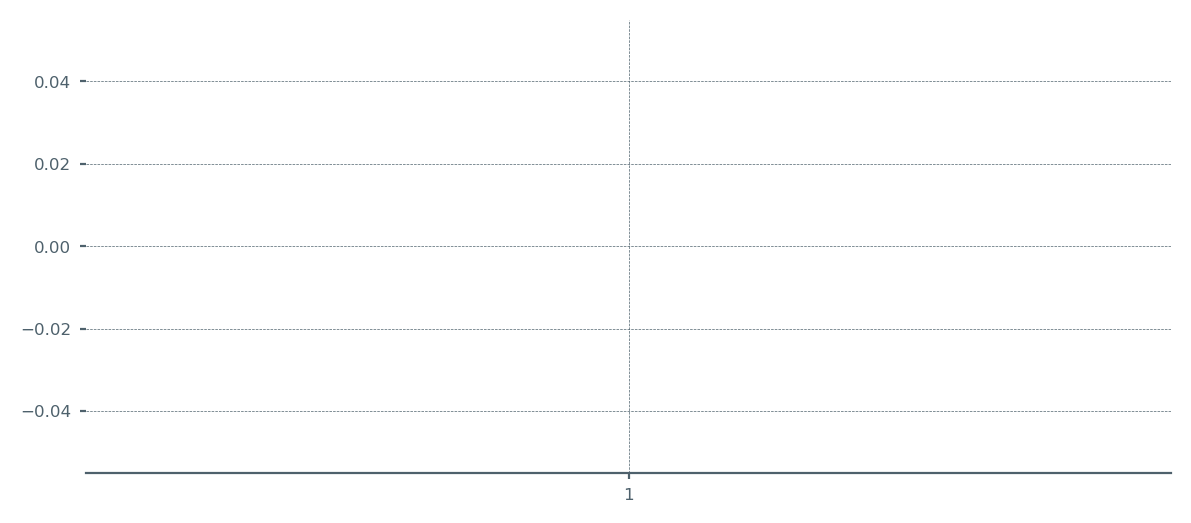

In [32]:
fig, ax = plt.subplots(figsize = (7,3), dpi = 200)

# --- Remove spines and add gridlines

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(ls = "--", lw = 0.25, color = "#4E616C")

# --- The data

ax.plot(X_, Y_for, marker = "o", mfc = "white", ms = 5)
ax.plot(X_, Y_ag, marker = "o", mfc = "white", ms = 5)

# --- Fill between

# Identify points where Y_for > Y_ag

pos_for = (Y_for > Y_ag)
ax.fill_between(x = X_[pos_for], y1 = Y_for[pos_for], y2 = Y_ag[pos_for], alpha = 0.5)

pos_ag = (Y_for <= Y_ag)
ax.fill_between(x = X_[pos_ag], y1 = Y_for[pos_ag], y2 = Y_ag[pos_ag], alpha = 0.5)

# --- Adjust tickers and spine to match the style of our grid

ax.xaxis.set_major_locator(ticker.MultipleLocator(2)) # ticker every 2 matchdays
xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])

ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)
ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)

ax.spines["bottom"].set_edgecolor("#4E616C")

In [33]:
X_aux = X_.copy()
X_aux.index = X_aux.index * 10 # 9 aux points in between each match
last_idx = X_aux.index[-1] + 1
X_aux = X_aux.reindex(range(last_idx))
X_aux = X_aux.interpolate()

IndexError: index -1 is out of bounds for axis 0 with size 0

In [ ]:
# --- Aux series for the xG created (Y_for)
Y_for_aux = Y_for.copy()
Y_for_aux.index = Y_for_aux.index * 10
last_idx = Y_for_aux.index[-1] + 1
Y_for_aux = Y_for_aux.reindex(range(last_idx))
Y_for_aux = Y_for_aux.interpolate()

# --- Aux series for the xG conceded (Y_ag)
Y_ag_aux = Y_ag.copy()
Y_ag_aux.index = Y_ag_aux.index * 10
last_idx = Y_ag_aux.index[-1] + 1
Y_ag_aux = Y_ag_aux.reindex(range(last_idx))
Y_ag_aux = Y_ag_aux.interpolate()

/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/2722799625.py:34: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])


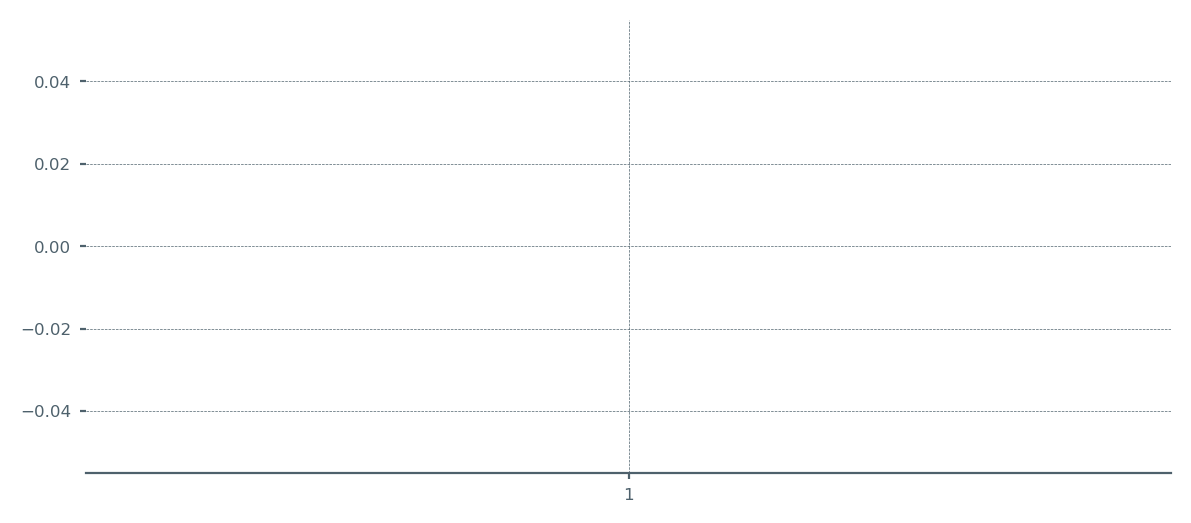

In [34]:
fig, ax = plt.subplots(figsize = (7,3), dpi = 200)

# --- Remove spines and add gridlines

ax.spines["left"].set_visible(False)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

ax.grid(ls = "--", lw = 0.25, color = "#4E616C")

# --- The data

for_ = ax.plot(X_, Y_for, marker = "o", mfc = "white", ms = 5)
ag_ = ax.plot(X_, Y_ag, marker = "o", mfc = "white", ms = 5)

# --- Fill between

for index in range(len(X_aux) - 1):
    # Choose color based on which line's on top
    if Y_for_aux.iloc[index + 1] > Y_ag_aux.iloc[index + 1]:
        color = for_[0].get_color()
    else:
        color = ag_[0].get_color()
    
    # Fill between the current point and the next point in pur extended series.
    ax.fill_between([X_aux[index], X_aux[index+1]], 
                    [Y_for_aux.iloc[index], Y_for_aux.iloc[index+1]], 
                    [Y_ag_aux.iloc[index], Y_ag_aux.iloc[index+1]], 
                    color=color, zorder = 2, alpha = 0.2, ec = None)

# --- Adjust tickers and spine to match the style of our grid

ax.xaxis.set_major_locator(ticker.MultipleLocator(2)) # ticker every 2 matchdays
xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])

ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)
ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)

ax.spines["bottom"].set_edgecolor("#4E616C")

In [66]:
def plot_xG_rolling(team, ax, window = 5, color_for = "blue", color_ag = "orange", data = df):
  '''
  This function creates a rolling average xG plot for a given team and rolling
  window.

  team (str): The team's name
  ax (obj): a Matplotlib axes.
  window (int): The number of periods for our rolling average.
  color_for (str): A hex color code for xG created.
  color_af (str): A hex color code for xG conceded.
  data (DataFrame): our df with the xG data.
  '''

  # -- Prepping the data
  home_df = data.copy()
  home_df = home_df.melt(id_vars = ["date", "home_team_name", "away_team_name"])
  home_df["venue"] = "H"
  home_df.rename(columns = {"home_team_name":"team", "away_team_name":"opponent"}, inplace = True)
  home_df.replace({"variable":{"home_team_xG":"xG_for", "away_team_xG":"xG_ag"}}, inplace = True)

  away_df = data.copy()
  away_df = away_df.melt(id_vars = ["date", "away_team_name", "home_team_name"])
  away_df["venue"] = "A"
  away_df.rename(columns = {"away_team_name":"team", "home_team_name":"opponent"}, inplace = True)
  away_df.replace({"variable":{"away_team_xG":"xG_for", "home_team_xG":"xG_ag"}}, inplace = True)

  df = pd.concat([home_df, away_df]).reset_index(drop = True)

  # ---- Filter the data

  Y_for = df[(df["team"] == team) & (df["variable"] == "xG_for")]["value"].reset_index(drop = True)
  Y_ag = df[(df["team"] == team) & (df["variable"] == "xG_ag")]["value"].reset_index(drop = True)
  X_ = pd.Series(range(len(Y_for)))

  if Y_for.shape[0] == 0:
    raise ValueError(f"Team {team} is not present in the DataFrame")

  # ---- Compute rolling average

  Y_for = Y_for.rolling(window = 5, min_periods = 0).mean() # min_periods is for partial avg.
  Y_ag = Y_ag.rolling(window = 5, min_periods = 0).mean()

  # ---- Create auxiliary series for filling between curves

  X_aux = X_.copy()
  X_aux.index = X_aux.index * 10 # 9 aux points in between each match
  last_idx = X_aux.index[-1] + 1
  X_aux = X_aux.reindex(range(last_idx))
  X_aux = X_aux.interpolate()

  # --- Aux series for the xG created (Y_for)
  Y_for_aux = Y_for.copy()
  Y_for_aux.index = Y_for_aux.index * 10
  last_idx = Y_for_aux.index[-1] + 1
  Y_for_aux = Y_for_aux.reindex(range(last_idx))
  Y_for_aux = Y_for_aux.interpolate()

  # --- Aux series for the xG conceded (Y_ag)
  Y_ag_aux = Y_ag.copy()
  Y_ag_aux.index = Y_ag_aux.index * 10
  last_idx = Y_ag_aux.index[-1] + 1
  Y_ag_aux = Y_ag_aux.reindex(range(last_idx))
  Y_ag_aux = Y_ag_aux.interpolate()

  # --- Plotting our data

  # --- Remove spines and add gridlines

  ax.spines["left"].set_visible(False)
  ax.spines["top"].set_visible(False)
  ax.spines["right"].set_visible(False)

  ax.grid(ls = "--", lw = 0.25, color = "#4E616C")

  # --- The data

  for_ = ax.plot(X_, Y_for, marker = "o", mfc = "white", ms = 4, color = color_for)
  ag_ = ax.plot(X_, Y_ag, marker = "o", mfc = "white", ms = 4, color = color_ag)

  # --- Fill between

  for index in range(len(X_aux) - 1):
      # Choose color based on which line's on top
      if Y_for_aux.iloc[index + 1] > Y_ag_aux.iloc[index + 1]:
          color = for_[0].get_color()
      else:
          color = ag_[0].get_color()
      
      # Fill between the current point and the next point in pur extended series.
      ax.fill_between([X_aux[index], X_aux[index+1]], 
                      [Y_for_aux.iloc[index], Y_for_aux.iloc[index+1]], 
                      [Y_ag_aux.iloc[index], Y_ag_aux.iloc[index+1]], 
                      color=color, zorder = 2, alpha = 0.2, ec = None)
      

  # --- Ensure minimum value of Y-axis is zero
  ax.set_ylim(0)

  # --- Adjust tickers and spine to match the style of our grid

  ax.xaxis.set_major_locator(ticker.MultipleLocator(2)) # ticker every 2 matchdays
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])

  ax.xaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)
  ax.yaxis.set_tick_params(length = 2, color = "#4E616C", labelcolor = "#4E616C", labelsize = 6)

  ax.spines["bottom"].set_edgecolor("#4E616C")

  # --- Legend and team name

  Y_for_last = Y_for.iloc[-1]
  Y_ag_last = Y_ag.iloc[-1]

  # -- Add the team's name
  team_ = ax.text(
            x = 0, y = ax.get_ylim()[1] + ax.get_ylim()[1]/20,
            s = f'{team}',
            color = '#000000' ,
            va = 'center',
            ha = 'left',
            size = 7
          )
  
  # -- Add the xG created label
  for_label_ = ax.text(
            x = X_.iloc[-1] + 0.75, y = Y_for_last,
            s = f'{Y_for_last:,.1f} xGF',
            color = color_for,
            va = 'center',
            ha = 'left',
            size = 6.5
          )

  # -- Add the xG conceded label
  ag_label_ = ax.text(
            x = X_.iloc[-1] + 0.75, y = Y_ag_last,
            s = f'{Y_ag_last:,.1f} xGA',
            color = color_ag,
            va = 'center',
            ha = 'left',
            size = 6.5
          )

In [67]:
df = pd.read_csv('Premier_League_xG.csv')
df

,Wk,Day,date,Time,home_team_name,home_team_xG,Score,away_team_xG,away_team_name,Attendance,Venue,Referee,Match Report,Notes
0,1.0,Fri,13/08/21,20:00,Brentford,1.3,2–0,1.4,Arsenal,"16,479",Brentford Community Stadium,Michael Oliver,Match Report,NaN
1,1.0,Sat,14/08/21,12:30,Manchester Utd,1.5,5–1,0.6,Leeds United,"72,732",Old Trafford,Paul Tierney,Match Report,NaN
2,1.0,Sat,14/08/21,15:00,Leicester City,0.8,1–0,1.1,Wolves,"31,983",King Power Stadium,Craig Pawson,Match Report,NaN
3,1.0,Sat,14/08/21,15:00,Burnley,1.0,1–2,1.3,Brighton,"16,910",Turf Moor,David Coote,Match Report,NaN
4,1.0,Sat,14/08/21,15:00,Chelsea,0.9,3–0,0.3,Crystal Palace,"38,965",Stamford Bridge,Jonathan Moss,Match Report,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
443,38.0,Sun,22/05/22,16:00,Norwich City,NaN,NaN,NaN,Tottenham,NaN,Carrow Road,NaN,Head-to-Head,NaN
444,38.0,Sun,22/05/22,16:00,Manchester City,NaN,NaN,NaN,Aston Villa,NaN,Etihad Stadium,NaN,Head-to-Head,NaN
445,38.0,Sun,22/05/22,16:00,Liverpool,NaN,NaN,NaN,Wolves,NaN,Anfield,NaN,Head-to-Head,NaN
446,38.0,Sun,22/05/22,16:00,Burnley,NaN,NaN,NaN,Newcastle Utd,NaN,Turf Moor,NaN,Head-to-Head,NaN


# CHOOSE CLUBS BELOW

/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/2231462551.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])
/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/2231462551.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])
/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/2231462551.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])
/var/folders/st/4y9f4v3j053640l45_zcykd40000gn/T/ipykernel_15040/2231462551.py:102: UserWarning: FixedFormatter should only be used together with FixedLocator
  xticks_ = ax.xaxis.set_ticklabels([x - 1 for x in range(0, len(X_) + 3, 2)])


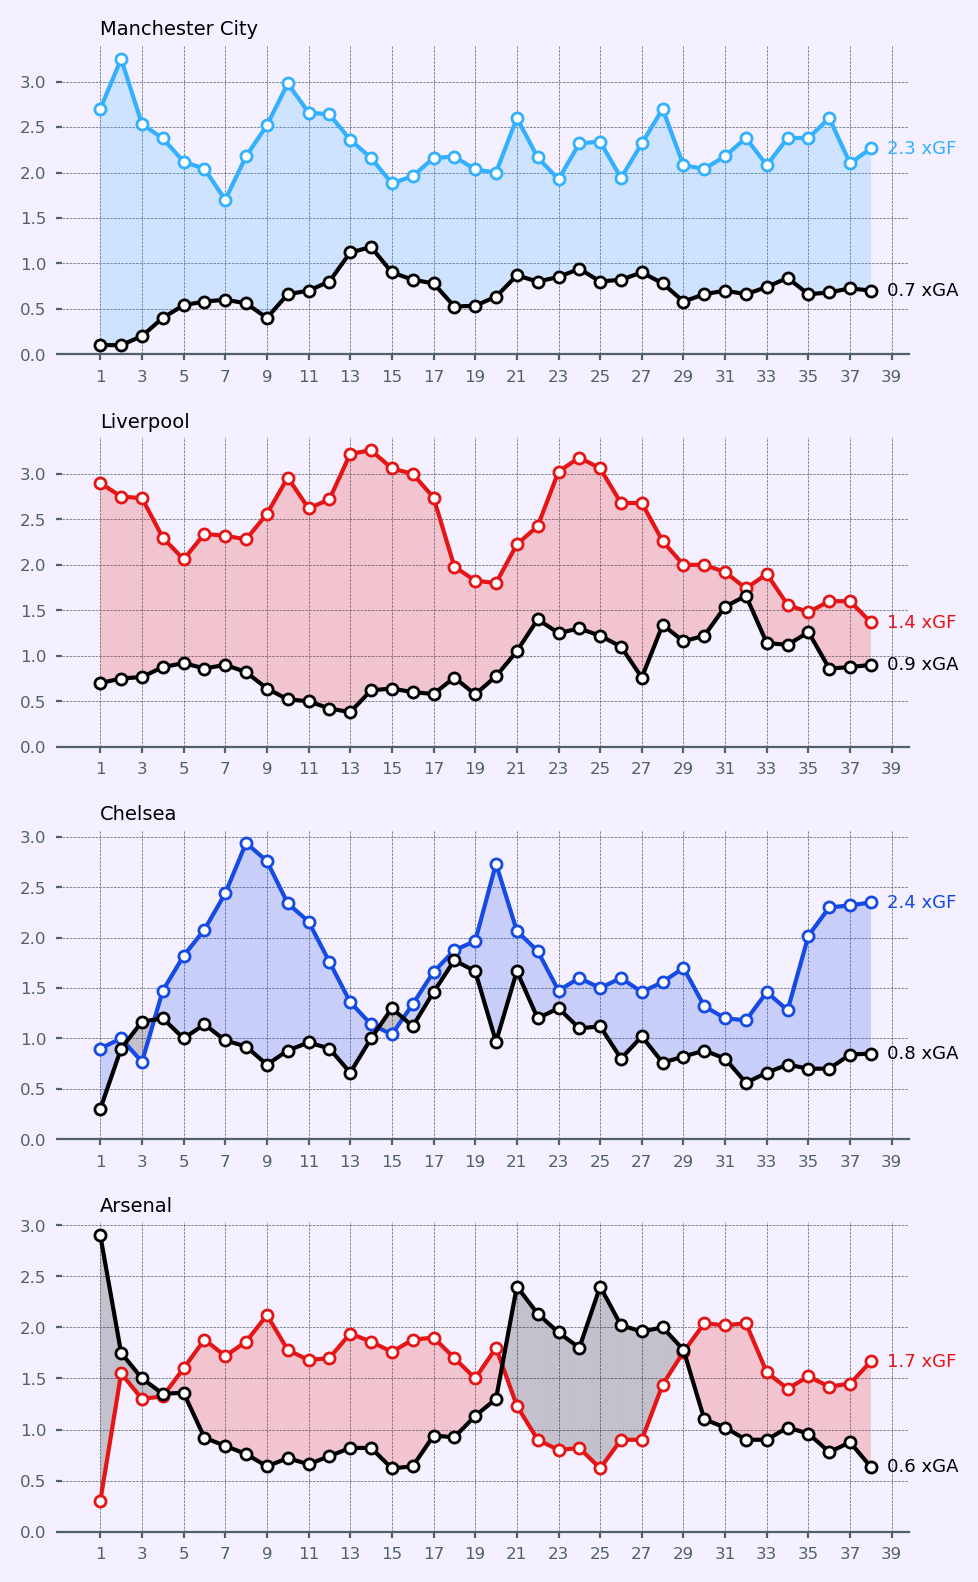

In [68]:
fig = plt.figure(figsize=(5, 8), dpi = 200, facecolor = "#f5f0ff")

ax1 = plt.subplot(411, facecolor = "#f5f0ff")
ax2 = plt.subplot(412, facecolor = "#f5f0ff")
ax3 = plt.subplot(413, facecolor = "#f5f0ff")
ax4 = plt.subplot(414, facecolor = "#f5f0ff")

plot_xG_rolling("Manchester City", ax1, color_for = "#33B0FF", color_ag = "#000000", data = df)
plot_xG_rolling("Liverpool", ax2, color_for = "#E51515", color_ag = "#000000", data = df)
plot_xG_rolling("Chelsea", ax3, color_for = "#154AE5", color_ag = "#000000", data = df)
plot_xG_rolling("Arsenal", ax4, color_for = "#E51515", color_ag = "#000000", data = df)

plt.tight_layout()